<h1>AGENDA
<H2>PREDICT THE QUALITY OF WINE USING SOME CHEMICAL PARAMETERS


<H1>PROLEM STATEMENT
<H2>WINE MATUFACTURING COMPANY WANTS TO CREATE A NEW BRAND OF WINE AND PREDICT THE QUATILITY OF WINE BASED ON DIFFERENT PARAMETERS

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

DATA COLLECTION

In [4]:
wine_dataset=pd.read_csv(r"C:\Users\DEVANSH\Desktop\projects\WINEQUALITY\winequality-red.csv")
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#CALCULATING THE NUMBER OF ROWS AND COLOMNS
wine_dataset.shape

(1599, 12)

In [6]:
#frst five rows of the dataset
wine_dataset.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#checking for missing value
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<h1>DATA ANALYSIS AND VISUALIZATION

In [8]:
#STATISTICAL MEASURES OF THE DATASET
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


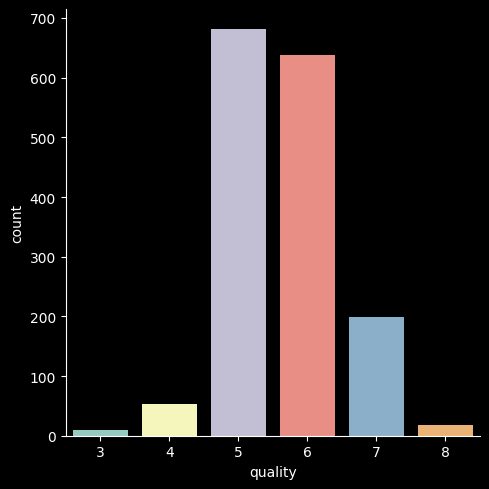

In [9]:
# number of values for each quality (if low number than bad quality else good qulity)
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

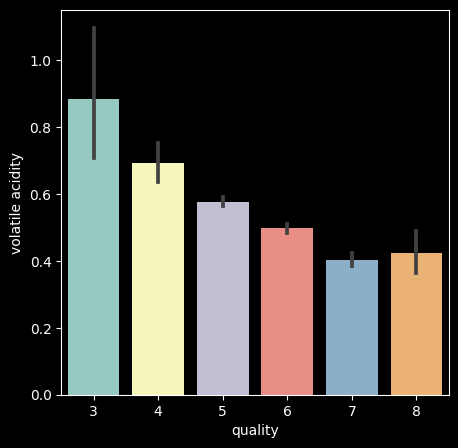

In [10]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='volatile acidity' ,data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

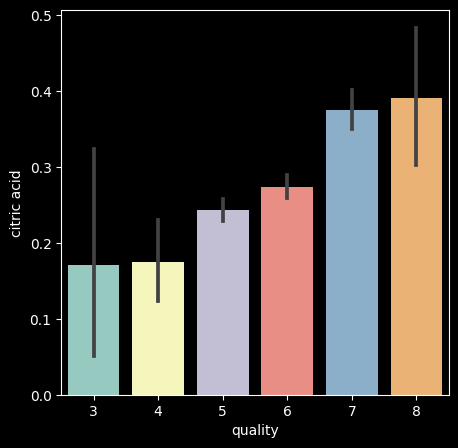

In [11]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality' , y='citric acid' , data=wine_dataset)


correlation of colomns<br>
positive corelation (if one value increase other also increase)<br>
negetive correlation (inversely proportional)<br>

<Axes: >

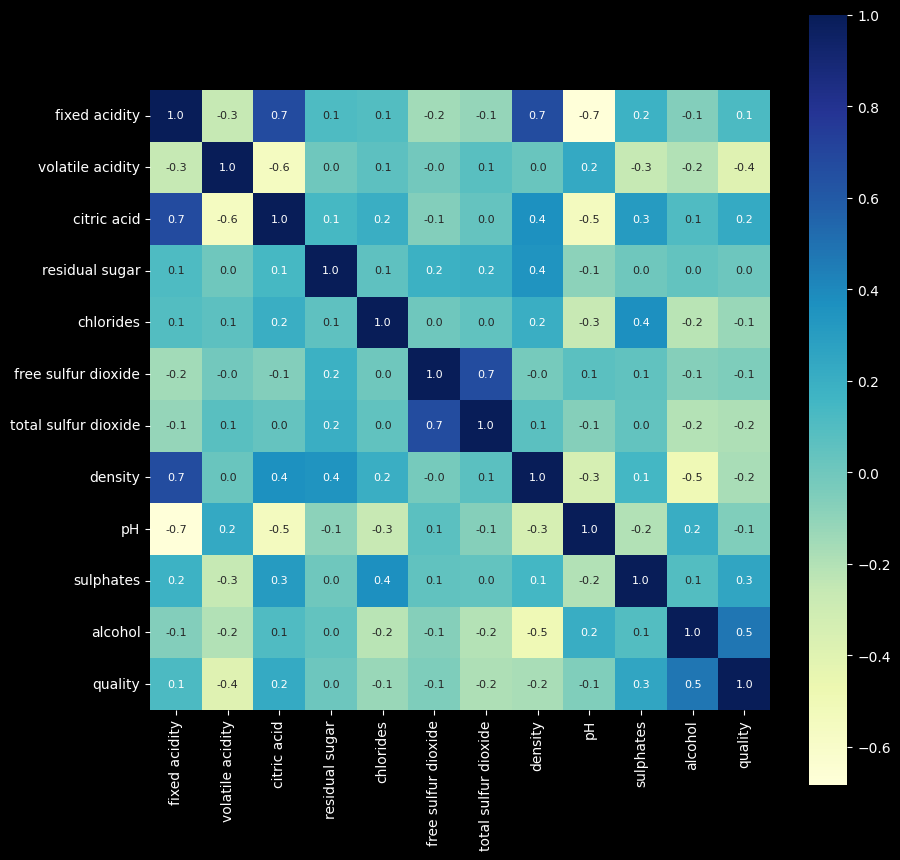

In [12]:
correlation=wine_dataset.corr()
#constructing scatterplot to understand the correlation between quality and  colomns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'YlGnBu') 
#correlation is relation between colomns 
# cbar=colorbar at right side along the graph
# square = shape 
# smt=sloating point numbers in this case it 1f i.e 1 number after decimal
# annot=printing values inside the square   

<h1>DATA PREPROCESSING

In [13]:
input=wine_dataset.drop("quality" , axis="columns")
input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
target=wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
#lambda function replace all the values from 0-6 to 0 and 6+ to 7
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


<h3>TRAINING THE MODEL 😎

In [15]:
from sklearn.model_selection import train_test_split
quality_test , quality_train , target_test , target_train=train_test_split(input , target , train_size=0.2)
print(target.shape, target_train.shape, target_test.shape)

(1599,) (1280,) (319,)


<h1>RANDOM FOREST CAN PREDICT UPTO DECIMAL VALUES

In [16]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(quality_train  , target_train)


RandomForestClassifier()

# Model evaluation
# Accuracy on test data


In [17]:

quality_test_prediction = model.predict(quality_test)
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(quality_test_prediction, target_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9216300940438872


<h1>DECISION TREE CAN PREDICT UPTO DECIMAL VALUES

In [18]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(quality_train  , target_train)
model.score(quality_train  , target_train)

1.0

<H1>Building a Predictive Model

In [19]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array and reshapping
input_data_as_numpy_array_reshapped = np.asarray(input_data).reshape(1,-1)

prediction = model.predict(input_data_as_numpy_array_reshapped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


c:\Users\DEVANSH\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
